# Connect to database

_Some initial imports and definitions:_

In [1]:
import pymongo as pm
from pymongo.errors import ConnectionFailure
from time import sleep
from ssl import CERT_NONE
import pandas as pd
import numpy as np

from IPython.core.display import HTML
display(HTML('<h1>Hello, world!</h1>'))

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib
import matplotlib.pyplot as plt

pd.options.display.max_columns = None



def save_to_file(filename, fig=None):
    """Save to @filename with a custom set of file formats.
    
    By default, this function takes to most recent figure,
    but a @fig can also be passed to this function as an argument.
    """
    formats = [
                "pdf",
                "eps",
                "png",
                "svg",
              ]
    if fig is None:
        for form in formats:
            plt.savefig("%s.%s"%(filename, form))
    else:
        for form in formats:
            fig.savefig("%s.%s"%(filename, form))

def header(h):
    display(HTML('<h1>%s</h1>' % h))

In [3]:
# Connect to our DB

from getpass import getpass; password=getpass('your secret')
# can now be used in shell commands (obviously, normally not printed):

client = pm.MongoClient('10.210.9.130', ssl=True, ssl_cert_reqs=CERT_NONE,
                        username='strands', authSource='admin', authMechanism='SCRAM-SHA-1',
                        serverSelectionTimeoutMS=5000, password=password)
#client = pm.MongoClient('lcas.lincoln.ac.uk', port=80)
#try:
   # The ismaster command is cheap and does not require auth.
dbs = {
    'y4': client.aafy4_message_store,
    'y3': client.aafy3_message_store,
    'y2': client.aafy2_message_store
}



your secret ··········


In [4]:
# Some simple test to see if it works:

#df = pd.DataFrame(list(dbs['y4']['nav_stats'].find({})))

df = pd.DataFrame.from_records(dbs['y2']['nav_stats'].find({'status': 'failed'}))
#display(df.head())
#df[['final_node']].drop_duplicates()
#df[['operation_time']].mean()
#df.shape[0]
df.head()

_id  \
0  55598e21681244049ef0b2f0   
1  555990ef681244049ef0b61c   
2  55599183681244049ef0b8d8   
3  55599c69681244049ef10cfd   
4  55599e96681244049ef11538   

                                               _meta  \
0  {'inserted_at': 2015-05-18 07:00:49.959000, 's...   
1  {'inserted_at': 2015-05-18 07:12:47.913000, 's...   
2  {'inserted_at': 2015-05-18 07:15:15.435000, 's...   
3  {'inserted_at': 2015-05-18 08:01:45.338000, 's...   
4  {'inserted_at': 2015-05-18 08:11:02.321000, 's...   

                             date_at_node  \
0  Monday, May 18 2015, at 09:00:49 hours   
1  Monday, May 18 2015, at 09:12:47 hours   
2  Monday, May 18 2015, at 09:15:13 hours   
3  Monday, May 18 2015, at 10:01:44 hours   
4  Monday, May 18 2015, at 10:11:01 hours   

                            date_finished  \
0  Monday, May 18 2015, at 09:00:49 hours   
1  Monday, May 18 2015, at 09:12:47 hours   
2  Monday, May 18 2015, at 09:15:15 hours   
3  Monday, May 18 2015, at 10:01:45 hours   
4  Monday, May 18 2015, at 10:11:02 hours   

                             date_started                  edge_id  \
0  Monday, May 18 2015, at 09:00:49 hours    WayPoint86_WayPoint90   
1  Monday, May 18 2015, at 09:12:47 hours    WayPoint26_WayPoint90   
2  Monday, May 18 2015, at 09:14:58 hours  WayPoint88_Kindergarten   
3  Monday, May 18 2015, at 10:01:44 hours    WayPoint86_WayPoint90   
4  Monday, May 18 2015, at 10:11:01 hours    WayPoint26_WayPoint90   

     final_node mon_events  operation_time      origin  status        target  \
0    WayPoint86         []        0.828023  WayPoint86  failed    WayPoint90   
1    WayPoint26         []        0.619103  WayPoint26  failed    WayPoint90   
2  Kindergarten         []       17.021091  WayPoint88  failed  Kindergarten   
3    WayPoint86         []        0.828731  WayPoint86  failed    WayPoint90   
4    WayPoint26         []        0.759469  WayPoint26  failed    WayPoint90   

   time_to_waypoint topological_map  
0          0.000000  aaf_deployment  
1          0.000000  aaf_deployment  
2          2.381081  aaf_deployment  
3          0.000000  aaf_deployment  
4          0.000000  aaf_deployment

In [6]:
# Some simple test to see if it works:

#df = pd.DataFrame(list(dbs['y4']['nav_stats'].find({})))

te = {}
te['y2'] = pd.DataFrame.from_records(dbs['y2']['task_events'].find({}))
#te['y3'] = pd.DataFrame.from_records(dbs['y3']['task_events'].find({}))
#te['y4'] = pd.DataFrame.from_records(dbs['y4']['task_events'].find({}))
#display(df.head())
#df[['final_node']].drop_duplicates()
#df[['operation_time']].mean()
#df.shape[0]
te['y2'].head()


"""
Some useful db commands:

db.getCollection('task_events').aggregate(
   {$project: {event:1}},
   {$group: {
        _id: "$event",
        count: {$sum: 1}
   }})
"""


_id  \
0  55598b8c681244049ef0b192   
1  55598b93681244049ef0b193   
2  55598bc3681244049ef0b194   
3  55598c40681244049ef0b198   
4  55598c45681244049ef0b19d   

                                               _meta      description  event  \
0  {'stored_type': 'strands_executive_msgs/TaskEv...                       1   
1  {'stored_type': 'strands_executive_msgs/TaskEv...                       1   
2  {'stored_type': 'strands_executive_msgs/TaskEv...  Routine started     30   
3  {'stored_type': 'strands_executive_msgs/TaskEv...                       1   
4  {'stored_type': 'strands_executive_msgs/TaskEv...                      12   

                                                task  \
0  {'start_node_id': 'ChargingPoint', 'max_durati...   
1  {'start_node_id': 'WayPoint57', 'max_duration'...   
2  {'start_node_id': '', 'max_duration': {'secs':...   
3  {'start_node_id': 'ChargingPoint', 'max_durati...   
4  {'start_node_id': '', 'max_duration': {'secs':...   

                                       time  
0  {'secs': 1431931788, 'nsecs': 310123920}  
1  {'secs': 1431931795, 'nsecs': 971721887}  
2  {'secs': 1431931843, 'nsecs': 258791923}  
3  {'secs': 1431931968, 'nsecs': 678833961}  
4  {'secs': 1431931973, 'nsecs': 822480916}

In [19]:
# numbers obtained from: db.getCollection('message_store').find({'_meta.stored_type': 'infremen/AtomicInteraction', 'screen': {'$ne': 1}}).count()

screen_tabs = [
    3278,
    10059,
    20666
]

screen_tabs_average_per_hour = np.sum(screen_tabs) / 365 / 9

mne = [
    248,
    1070,
    4273
]

mne_average_per_hour = np.sum(mne) / 365 / 9

print(screen_tabs_average_per_hour)
print(mne_average_per_hour)
print ((1930.0+614.0) / 365 / 9)
print (25/365 / 9)

cp_days = 58
cp_hours = 1014
cp_interactions = 600
cp_users = 344

cp_IpD = cp_interactions/cp_days

print(cp_IpD)


10.350989345509895
1.7019786910197867
0.7744292237442922
0.0076103500761035
10.344827586206897


In [6]:
# monitored nav events
coll = dbs['y4']['monitored_nav_events']
#print(coll.count())
pipeline = [
    {
        '$limit': 5000
    },
    {
        '$project': {
            'start_pose_x': '$event_start_pose.position.x',
            'start_pose_y': '$event_start_pose.position.y',
            'end_pose_x': '$event_end_pose.position.x',
            'end_pose_y': '$event_end_pose.position.y',
            'start_time': {'$add': ['$event_start_time.secs', {'$divide': ['$event_start_time.nsecs', 1000000000.0]}]},
            'start_time_secs': '$event_start_time.secs',
            'start_time_nsecs': '$event_start_time.nsecs',
            'end_time': {'$add': ['$event_end_time.secs', {'$divide': ['$event_end_time.nsecs', 1000000000.0]}]},
            'end_time_secs': '$event_end_time.secs',
            'end_time_nsecs': '$event_end_time.nsecs',
            'was_helped': 1, 'n_help_requests': 1,
            'edge_id': 1,
            'recover_mechanism': 1,
            'inserted_at': '$_meta.inserted_at'
        }
    }
]

agg = coll.aggregate(pipeline)

df_mne = pd.DataFrame.from_records(agg)

# compute calculated columns
df_mne['duration'] = (df_mne.end_time - df_mne.start_time)
df_mne['inserted_at_secs'] = df_mne.inserted_at.astype(np.int64) // 10**9
df_mne.set_index('inserted_at_secs', drop=False, inplace=True)
df_mne.sort_index(inplace=True)

df_mne.to_pickle('MNE_y4.p')
df_mne.head()


_id edge_id  end_pose_x  end_pose_y  \
inserted_at_secs                                                             
1478607207        5821c167b63c4d097bada237          -18.140426  -70.186561   
1478607228        5821c17cb63c4d097bada239          -18.140426  -70.186561   
1478607260        5821c19cb63c4d097bada23b          -18.026326  -69.862764   
1478607301        5821c1c5b63c4d097bada23d          -18.594153  -70.210300   
1478607324        5821c1dcb63c4d097bada23f          -18.592843  -70.209768   

                      end_time  end_time_nsecs  end_time_secs  \
inserted_at_secs                                                
1478607207        1.478607e+09       504234075     1478607207   
1478607228        1.478607e+09       617881059     1478607228   
1478607260        1.478607e+09       672528982     1478607260   
1478607301        1.478607e+09       328999042     1478607301   
1478607324        1.478607e+09       986634016     1478607323   

                             inserted_at  n_help_requests recover_mechanism  \
inserted_at_secs                                                              
1478607207       2016-11-08 12:13:27.740                1   sleep_and_retry   
1478607228       2016-11-08 12:13:48.669                2         backtrack   
1478607260       2016-11-08 12:14:20.933                1   sleep_and_retry   
1478607301       2016-11-08 12:15:01.503                2         backtrack   
1478607324       2016-11-08 12:15:24.080                3         backtrack   

                  start_pose_x  start_pose_y    start_time  start_time_nsecs  \
inserted_at_secs                                                               
1478607207          -18.140426    -70.186561  1.478607e+09         137943983   
1478607228          -18.140426    -70.186561  1.478607e+09         448864936   
1478607260          -18.026326    -69.862764  1.478607e+09         452892065   
1478607301          -18.026326    -69.862764  1.478607e+09         197510004   
1478607324          -18.594153    -70.210300  1.478607e+09         714020967   

                  start_time_secs was_helped   duration  inserted_at_secs  
inserted_at_secs                                                           
1478607207             1478607201      False   6.366290        1478607207  
1478607228             1478607225      False   3.169016        1478607228  
1478607260             1478607254      False   6.219637        1478607260  
1478607301             1478607278      False  23.131489        1478607301  
1478607324             1478607319      False   4.272613        1478607324

In [7]:
# nav_stats
import numpy as np
coll = dbs['y4']['nav_stats']

pipeline = [
    {
        '$match': {
        }
    },
    {
        '$project': {
            'date_finished': 1,
            'date_start': 1,
            'origin': 1,
            'final_node': 1,
            'target': 1,
            'operation_time': 1, 'status': 1,
            'edge_id': 1,
            'topological_map': 1,
            'inserted_at': '$_meta.inserted_at'
        }
    }
]

agg = coll.aggregate(pipeline)

df_ns = pd.DataFrame.from_records(agg)

# compute calculated columns
df_ns['inserted_at_secs'] = df_ns.inserted_at.astype(np.int64) // 10**9
df_ns['start_at_secs'] = np.int64(df_ns.inserted_at_secs - df_ns.operation_time)
df_ns.set_index('start_at_secs', drop=False, inplace=True)
df_ns.sort_index(inplace=True)
df_ns.to_pickle('nav_stats_y4.p')
display(df_ns.head())
print(df_ns.shape)

_id  \
start_at_secs                             
1480274123     583b30dfb63c4d6eb86ff88e   
1480274367     583b31d7b63c4d6eb86ff88f   
1480274458     583b322eb63c4d6eb86ff890   
1480318516     583bde4ab63c4d6eb86ff8a6   
1480318538     583bde53b63c4d6eb86ff8a7   

                                             date_finished  \
start_at_secs                                                
1480274123     Sunday, November 27 2016, at 20:15:43 hours   
1480274367     Sunday, November 27 2016, at 20:19:51 hours   
1480274458     Sunday, November 27 2016, at 20:21:18 hours   
1480318516     Monday, November 28 2016, at 08:35:38 hours   
1480318538     Monday, November 28 2016, at 08:35:47 hours   

                             edge_id     final_node             inserted_at  \
start_at_secs                                                                 
1480274123     Station_ChargingPoint  ChargingPoint 2016-11-27 19:15:43.999   
1480274367     ChargingPoint_Station        Station 2016-11-27 19:19:51.098   
1480274458     Station_ChargingPoint  ChargingPoint 2016-11-27 19:21:18.512   
1480318516     ChargingPoint_Station        Station 2016-11-28 07:35:38.749   
1480318538        Station_WayPoint91     WayPoint91 2016-11-28 07:35:47.600   

               operation_time         origin   status         target  \
start_at_secs                                                          
1480274123          19.893930        Station  success  ChargingPoint   
1480274367          23.572407  ChargingPoint  success        Station   
1480274458          19.336452        Station  success  ChargingPoint   
1480318516          21.574658  ChargingPoint  success        Station   
1480318538           8.723706        Station  success     WayPoint91   

              topological_map  inserted_at_secs  start_at_secs  
start_at_secs                                                   
1480274123             aaf_y4        1480274143     1480274123  
1480274367             aaf_y4        1480274391     1480274367  
1480274458             aaf_y4        1480274478     1480274458  
1480318516             aaf_y4        1480318538     1480318516  
1480318538             aaf_y4        1480318547     1480318538

(32959, 12)


joined valid rows: 3776 (out of 4273 original MNEs)


failed     1570
success    1111
fatal       415
Name: status, dtype: int64

status                   failed  fatal  success     All
recover_mechanism                                      
backtrack                 291.0   64.0    211.0   566.0
carpet_backtrack            0.0    3.0      0.0     3.0
nav_help                 1037.0  254.0    167.0  1458.0
recover_bumper            119.0  129.0    270.0   518.0
recover_stuck_on_carpet    12.0   31.0     21.0    64.0
sleep_and_retry           289.0   48.0    506.0   843.0
walking_group_help        182.0   85.0     57.0   324.0
All                      1930.0  614.0   1232.0  3776.0

status                      failed      fatal    success         All
recover_mechanism                                                   
backtrack                 7.706568   1.694915   5.587924   14.989407
carpet_backtrack          0.000000   0.079449   0.000000    0.079449
nav_help                 27.462924   6.726695   4.422669   38.612288
recover_bumper            3.151483   3.416314   7.150424   13.718220
recover_stuck_on_carpet   0.317797   0.820975   0.556144    1.694915
sleep_and_retry           7.653602   1.271186  13.400424   22.325212
walking_group_help        4.819915   2.251059   1.509534    8.580508
All                      51.112288  16.260593  32.627119  100.000000

status                      failed      fatal    success        All
recover_mechanism                                                  
backtrack                22.441665  17.896907  21.619072  21.621115
carpet_backtrack          0.000000  95.029067   0.000000  95.029067
nav_help                 36.238817  21.177349  31.520034  33.074448
recover_bumper           21.640981  58.168487  18.676073  29.192184
recover_stuck_on_carpet   1.676304   1.572992   1.632082   1.611752
sleep_and_retry           6.020417   5.858364   6.029484   6.016632
walking_group_help        0.865903   7.640564   8.835192   4.045210
All                      25.182935  24.906650  14.981176  21.809469

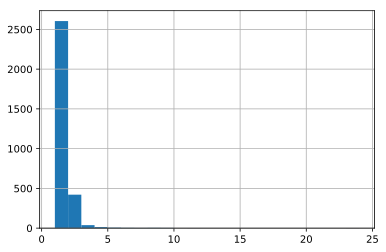

In [20]:
# join the MNE with the NS, driven by MNEs. Match based on computed start time of the NS and the insertion of the MNE, 
# cut off of 10 minutes (600 secs) to only return reasonable matches) 
df_join = pd.merge_asof(
    df_mne, df_ns, left_on='inserted_at_secs', right_on='start_at_secs', tolerance=np.int64(600),
    suffixes=['_MNE', '_NS'])

# drop anything that couldn't be matches (we only look at MNE that have an actual NS)
df_join.dropna(inplace=True)

# compute timediff between start of NS and the MNE 
df_join['diff'] = (df_join.inserted_at_secs_MNE - df_join.start_at_secs)

print('joined valid rows: %d (out of %d original MNEs)' % (
    df_join.shape[0], df_mne.shape[0])
)

df_join['id_NS'] = df_join['_id_NS'].astype('str')
df_join['id_MNE'] = df_join['_id_MNE'].astype('str')

df_NS_clean = df_join.drop_duplicates(subset=['_id_NS'])

header('number of different outcomes in NS:')
display(df_NS_clean['status'].value_counts())

#df_join.loc[df_join['id_NS'] == '583d6eb5b63c4d6eb871128e']

header('pivot table in absolute numbers of navigation stats:')
pt = pd.pivot_table(
    df_join, values='duration', index=['recover_mechanism'],
    columns=['status'], aggfunc='count', margins=True,
    fill_value=0)

display(pt)

header('pivot table in relative % of navigation stats:')
pt = pd.pivot_table(
    df_join, values='duration', index=['recover_mechanism'],
    columns=['status'], aggfunc='count', margins=True,
    fill_value=0).div(len(df_join.index)).mul(100)

display(pt)


header('pivot table of mean duration of navigation stats:')
pt = pd.pivot_table(
    df_join, values='duration', index=['recover_mechanism'],
    columns=['status'], aggfunc=np.mean, margins=True,
    fill_value=0)

display(pt)
#df_join.dtypes

header('Histogram of number of MNE per NS:')

df_individual_NS = df_join.groupby(['id_NS'])['id_MNE'].nunique()
df_individual_NS.hist(bins=range(1,25))

data spans 156 days


_id edge_id  end_pose_x  end_pose_y  \
inserted_at_secs                                                             
1478607207        5821c167b63c4d097bada237          -18.140426  -70.186561   
1478607228        5821c17cb63c4d097bada239          -18.140426  -70.186561   
1478607260        5821c19cb63c4d097bada23b          -18.026326  -69.862764   
1478607301        5821c1c5b63c4d097bada23d          -18.594153  -70.210300   
1478607324        5821c1dcb63c4d097bada23f          -18.592843  -70.209768   
1478607382        5821c216b63c4d097bada241          -16.683038  -70.310296   
1478608354        5821c5e2b63c4d097bada26a          -28.700127  -74.875314   
1478608372        5821c5f4b63c4d097bada26c          -28.700127  -74.875314   
1478608412        5821c61cb63c4d097bada26d          -28.700127  -74.875314   
1478608432        5821c630b63c4d097bada26f          -28.700127  -74.875314   

                      end_time  end_time_nsecs  end_time_secs  \
inserted_at_secs                                                
1478607207        1.478607e+09       504234075     1478607207   
1478607228        1.478607e+09       617881059     1478607228   
1478607260        1.478607e+09       672528982     1478607260   
1478607301        1.478607e+09       328999042     1478607301   
1478607324        1.478607e+09       986634016     1478607323   
1478607382        1.478607e+09       400078058     1478607382   
1478608354        1.478608e+09       155313014     1478608354   
1478608372        1.478608e+09        25638103     1478608372   
1478608412        1.478608e+09       276782035     1478608412   
1478608432        1.478608e+09       760452032     1478608432   

                             inserted_at  n_help_requests recover_mechanism  \
inserted_at_secs                                                              
1478607207       2016-11-08 12:13:27.740                1   sleep_and_retry   
1478607228       2016-11-08 12:13:48.669                2         backtrack   
1478607260       2016-11-08 12:14:20.933                1   sleep_and_retry   
1478607301       2016-11-08 12:15:01.503                2         backtrack   
1478607324       2016-11-08 12:15:24.080                3         backtrack   
1478607382       2016-11-08 12:16:22.625                2    recover_bumper   
1478608354       2016-11-08 12:32:34.432                1   sleep_and_retry   
1478608372       2016-11-08 12:32:52.082                2         backtrack   
1478608412       2016-11-08 12:33:32.379                2          nav_help   
1478608432       2016-11-08 12:33:52.876                3         backtrack   

                  start_pose_x  start_pose_y    start_time  start_time_nsecs  \
inserted_at_secs                                                               
1478607207          -18.140426    -70.186561  1.478607e+09         137943983   
1478607228          -18.140426    -70.186561  1.478607e+09         448864936   
1478607260          -18.026326    -69.862764  1.478607e+09         452892065   
1478607301          -18.026326    -69.862764  1.478607e+09         197510004   
1478607324          -18.594153    -70.210300  1.478607e+09         714020967   
1478607382          -18.592843    -70.209768  1.478607e+09         115691900   
1478608354          -28.700127    -74.875314  1.478608e+09         919209957   
1478608372          -28.700127    -74.875314  1.478608e+09         342571020   
1478608412          -28.700127    -74.875314  1.478608e+09          89374065   
1478608432          -28.700127    -74.875314  1.478608e+09         507524967   

                  start_time_secs was_helped   duration  inserted_at_secs  \
inserted_at_secs                                                            
1478607207             1478607201      False   6.366290        1478607207   
1478607228             1478607225      False   3.169016        1478607228   
1478607260             1478607254      False   6.219637        1478607260   
1478607301             147

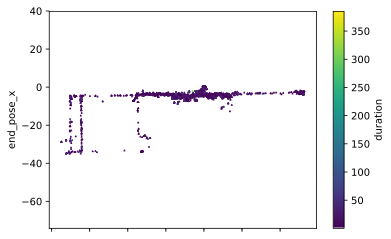

In [24]:

df_mne['day'] = df_mne.start_time // (60 * 60 * 24)
first_day = df_mne['day'].min()
last_day = df_mne['day'].max()
print('data spans %d days' % (last_day - first_day))
# shift days to start date to begin with 0


df_mne.plot.scatter(y='end_pose_x', x='end_pose_y', colormap='viridis', s=1, marker='^', c='duration').set_aspect('equal', 'datalim')
df_mne.head(10)

#save_to_file('MNE_y4_map')

array([[-0.52538374],
       [-0.63960222],
       [-0.53062273],
       ...,
       [-0.66409697],
       [-0.71827037],
       [-0.66276758]])

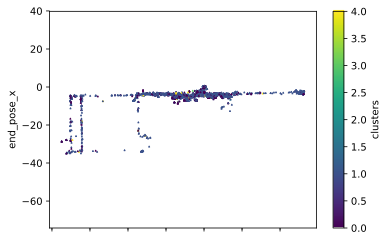

In [42]:
from scipy import stats
from sklearn.cluster import KMeans

clmns = [ 'duration']
df_tr = df_mne
df_tr_std = stats.zscore(df_tr[clmns])

display(df_tr_std)

#Cluster the data
kmeans = KMeans(n_clusters=5, random_state=0).fit(df_tr_std)
labels = kmeans.labels_
df_tr['clusters'] = labels
df_mne.plot.scatter(y='end_pose_x', x='end_pose_y', colormap='viridis', s=1, marker='^', c='clusters').set_aspect('equal', 'datalim')
